In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [15]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file)
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719LA.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
all_data = pd.read_csv("201719LA.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
del all_data['trip_id']
del all_data['plan_duration']
del all_data['start_station_id']
del all_data['Unnamed: 0']
del all_data['end_station_id']
del all_data['start_lat']
del all_data['start_lon']
del all_data['end_lat']
del all_data['end_lon']
del all_data['trip_route_category']

In [4]:
all_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type
0,7.0,2019-04-01 00:02:00,2019-04-01 00:09:00,3069.0,3034.0,6459,Walk-up,standard
1,12.0,2019-04-01 00:56:00,2019-04-01 01:08:00,3031.0,4311.0,12229,Monthly Pass,standard
2,12.0,2019-04-01 01:06:00,2019-04-01 01:18:00,3038.0,3082.0,6422,Walk-up,standard
3,48.0,2019-04-01 01:08:00,2019-04-01 01:56:00,3068.0,3005.0,12211,Monthly Pass,standard
4,9.0,2019-04-01 01:09:00,2019-04-01 01:18:00,3038.0,3082.0,12005,Walk-up,standard


In [5]:
all_data['start_time'] = pd.to_datetime(all_data["start_time"])
all_data['end_time'] = pd.to_datetime(all_data["end_time"])
all_data['year'] = all_data["start_time"].dt.year
all_data['month'] = all_data["start_time"].dt.month
all_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month
0,7.0,2019-04-01 00:02:00,2019-04-01 00:09:00,3069.0,3034.0,6459,Walk-up,standard,2019,4
1,12.0,2019-04-01 00:56:00,2019-04-01 01:08:00,3031.0,4311.0,12229,Monthly Pass,standard,2019,4
2,12.0,2019-04-01 01:06:00,2019-04-01 01:18:00,3038.0,3082.0,6422,Walk-up,standard,2019,4
3,48.0,2019-04-01 01:08:00,2019-04-01 01:56:00,3068.0,3005.0,12211,Monthly Pass,standard,2019,4
4,9.0,2019-04-01 01:09:00,2019-04-01 01:18:00,3038.0,3082.0,12005,Walk-up,standard,2019,4


In [6]:
all_data['start_hour'] = all_data['start_time'].dt.hour
all_data['day_of_week'] = all_data['start_time'].dt.day_name()
all_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
0,7.0,2019-04-01 00:02:00,2019-04-01 00:09:00,3069.0,3034.0,6459,Walk-up,standard,2019,4,0,Monday
1,12.0,2019-04-01 00:56:00,2019-04-01 01:08:00,3031.0,4311.0,12229,Monthly Pass,standard,2019,4,0,Monday
2,12.0,2019-04-01 01:06:00,2019-04-01 01:18:00,3038.0,3082.0,6422,Walk-up,standard,2019,4,1,Monday
3,48.0,2019-04-01 01:08:00,2019-04-01 01:56:00,3068.0,3005.0,12211,Monthly Pass,standard,2019,4,1,Monday
4,9.0,2019-04-01 01:09:00,2019-04-01 01:18:00,3038.0,3082.0,12005,Walk-up,standard,2019,4,1,Monday


In [7]:
all_data['duration'].describe()

count    831491.000000
mean        106.457669
std        1466.949024
min           1.000000
25%           7.000000
50%          13.000000
75%          27.000000
max       86400.000000
Name: duration, dtype: float64

In [8]:
#Based on the pricing system I'd expect the majority of rides to be under 2 hours
#and no longer than 4 hours
no_outliers_data = all_data[all_data['duration'] < 240]
no_outliers_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
0,7.0,2019-04-01 00:02:00,2019-04-01 00:09:00,3069.0,3034.0,6459,Walk-up,standard,2019,4,0,Monday
1,12.0,2019-04-01 00:56:00,2019-04-01 01:08:00,3031.0,4311.0,12229,Monthly Pass,standard,2019,4,0,Monday
2,12.0,2019-04-01 01:06:00,2019-04-01 01:18:00,3038.0,3082.0,6422,Walk-up,standard,2019,4,1,Monday
3,48.0,2019-04-01 01:08:00,2019-04-01 01:56:00,3068.0,3005.0,12211,Monthly Pass,standard,2019,4,1,Monday
4,9.0,2019-04-01 01:09:00,2019-04-01 01:18:00,3038.0,3082.0,12005,Walk-up,standard,2019,4,1,Monday


In [10]:
no_outliers_data[no_outliers_data['passholder_type'].str.contains('Testing')]

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
10010,1.0,2019-04-16 14:23:00,2019-04-16 14:24:00,3000.0,4363.0,15238,Testing,smart,2019,4,14,Tuesday
10495,2.0,2019-04-17 10:12:00,2019-04-17 10:14:00,4363.0,4363.0,15632,Testing,smart,2019,4,10,Wednesday
11930,1.0,2019-04-19 10:42:00,2019-04-19 10:43:00,4285.0,4372.0,16159,Testing,smart,2019,4,10,Friday
11947,1.0,2019-04-19 11:25:00,2019-04-19 11:26:00,4372.0,4372.0,15741,Testing,smart,2019,4,11,Friday
11949,1.0,2019-04-19 11:26:00,2019-04-19 11:27:00,4372.0,4372.0,15868,Testing,smart,2019,4,11,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
341104,8.0,2019-12-03 10:06:24,2019-12-03 10:14:30,4394.0,4394.0,15809,Testing,smart,2019,12,10,Tuesday
341845,19.0,2019-12-04 12:57:34,2019-12-04 13:16:53,4470.0,4459.0,16095,Testing,smart,2019,12,12,Wednesday
342463,9.0,2019-12-05 09:12:20,2019-12-05 09:21:51,4460.0,4394.0,15723,Testing,smart,2019,12,9,Thursday
347109,63.0,2019-12-11 15:15:26,2019-12-11 16:18:26,4286.0,4346.0,15899,Testing,smart,2019,12,15,Wednesday


In [11]:
#Drop any rows that are Testing
no_outliers_data = no_outliers_data[~no_outliers_data['passholder_type'].isin(['Testing'])]

In [12]:
no_outliers_data['passholder_type'].unique()

array(['Walk-up', 'Monthly Pass', 'Annual Pass', 'Flex Pass',
       'One Day Pass'], dtype=object)

In [13]:
no_outliers_data.replace({'Monthly Pass':'Subscriber', 'Annual Pass':'Subscriber', 'Walk-up':'Customer', 'Flex Pass':'Customer', 'One Day Pass':'Customer'}, inplace=True)


In [14]:
no_outliers_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
0,7.0,2019-04-01 00:02:00,2019-04-01 00:09:00,3069.0,3034.0,6459,Customer,standard,2019,4,0,Monday
1,12.0,2019-04-01 00:56:00,2019-04-01 01:08:00,3031.0,4311.0,12229,Subscriber,standard,2019,4,0,Monday
2,12.0,2019-04-01 01:06:00,2019-04-01 01:18:00,3038.0,3082.0,6422,Customer,standard,2019,4,1,Monday
3,48.0,2019-04-01 01:08:00,2019-04-01 01:56:00,3068.0,3005.0,12211,Subscriber,standard,2019,4,1,Monday
4,9.0,2019-04-01 01:09:00,2019-04-01 01:18:00,3038.0,3082.0,12005,Customer,standard,2019,4,1,Monday


In [15]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719LACleaned.csv", index=False)

#### Start of Data Analysis

In [3]:
data = pd.read_csv('201719LACleaned.csv')
data.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
0,7.0,2019-04-01 00:02:00,2019-04-01 00:09:00,3069.0,3034.0,6459,Customer,standard,2019,4,0,Monday
1,12.0,2019-04-01 00:56:00,2019-04-01 01:08:00,3031.0,4311.0,12229,Subscriber,standard,2019,4,0,Monday
2,12.0,2019-04-01 01:06:00,2019-04-01 01:18:00,3038.0,3082.0,6422,Customer,standard,2019,4,1,Monday
3,48.0,2019-04-01 01:08:00,2019-04-01 01:56:00,3068.0,3005.0,12211,Subscriber,standard,2019,4,1,Monday
4,9.0,2019-04-01 01:09:00,2019-04-01 01:18:00,3038.0,3082.0,12005,Customer,standard,2019,4,1,Monday


In [45]:
data['start_station']=data['start_station'].astype(str)

In [46]:
data['end_station']=data['end_station'].astype(str)

In [17]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [18]:
users = data['passholder_type'].value_counts().keys().to_list()
count = data['passholder_type'].value_counts().to_list()

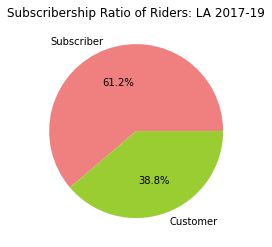

In [19]:
plt.pie(count, labels=users, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: LA 2017-19")
plt.show()

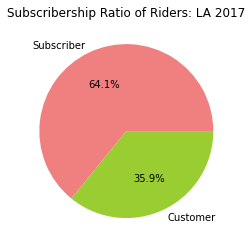

In [20]:
users_17 = df1['passholder_type'].value_counts().keys().to_list()
count_17 = df1['passholder_type'].value_counts().to_list()
plt.pie(count_17, labels=users_17, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: LA 2017")
plt.show()

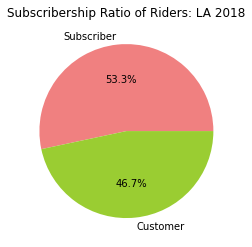

In [21]:
users_18 = df2['passholder_type'].value_counts().keys().to_list()
count_18 = df2['passholder_type'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: LA 2018")
plt.show()

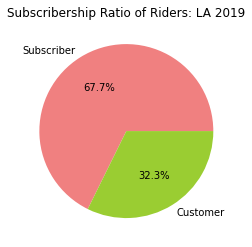

In [22]:
users_19 = df3['passholder_type'].value_counts().keys().to_list()
count_19 = df3['passholder_type'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: LA 2019")
plt.show()

In [23]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

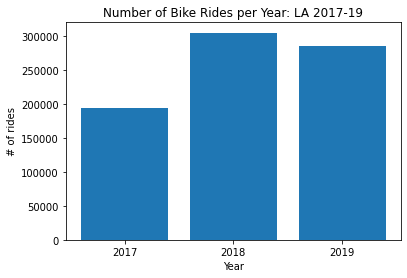

In [24]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides per Year: LA 2017-19")
plt.show()

In [25]:
num_bikes_year =[]
num_bikes1 = len(df1['bike_id'].unique())
num_bikes_year.append(num_bikes1)

In [26]:
num_bikes2 = len(df2['bike_id'].unique())
num_bikes_year.append(num_bikes2)

In [27]:
num_bikes3 = len(df3['bike_id'].unique())
num_bikes_year.append(num_bikes3)

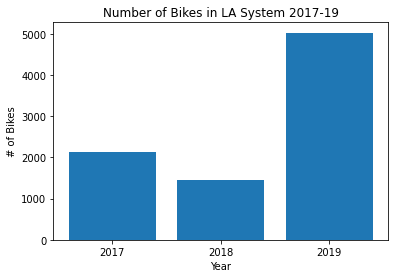

In [28]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in LA System 2017-19")
plt.show()

In [29]:
#track rides by day of week over 3 year period
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [110760,117190,112315,115029,119837,105267,105321]

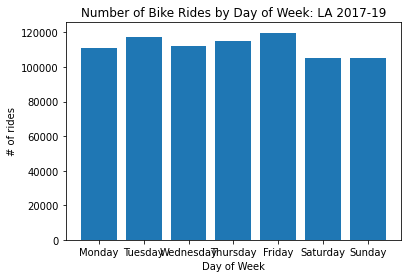

In [30]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Day of Week: LA 2017-19")
plt.show()

In [31]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [32]:
weekend_hours = weekend_df['start_hour'].value_counts().keys().to_list()
weekend_count = weekend_df['start_hour'].value_counts().to_list()

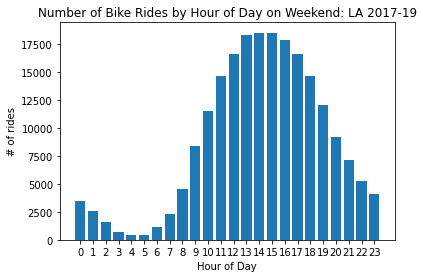

In [33]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: LA 2017-19")
plt.show()

In [34]:
weekday_hours = weekday_df['start_hour'].value_counts().keys().to_list()
weekday_count = weekday_df['start_hour'].value_counts().to_list()

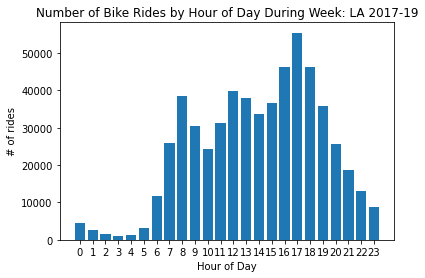

In [35]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: LA 2017-19")
plt.show()

In [36]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [37]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

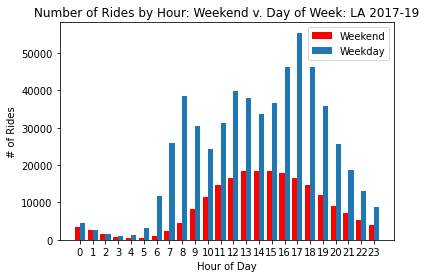

In [39]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: LA 2017-19')
plt.legend(loc = 'best')
plt.show()

In [40]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

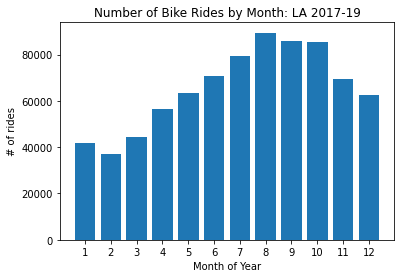

In [41]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Month: LA 2017-19")
plt.show()

In [47]:
#track most common and least common start stations over 3 year period
start_stations = data['start_station'].value_counts().keys().to_list()
num_start = data['start_station'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

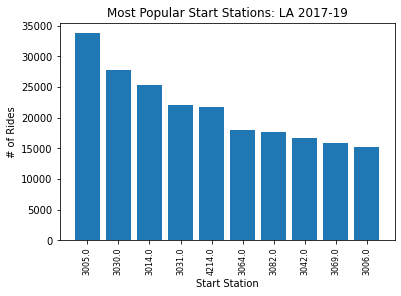

In [48]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: LA 2017-19")
plt.show()

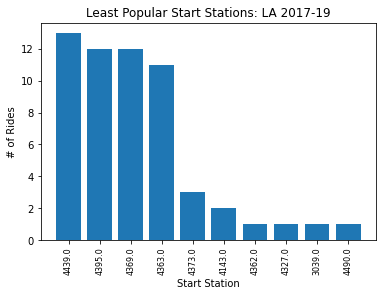

In [49]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: LA 2017-19")
plt.show()

In [50]:
#track most common and leas common end stations over 3 year period
end_stations = data['end_station'].value_counts().keys().to_list()
num_end = data['end_station'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

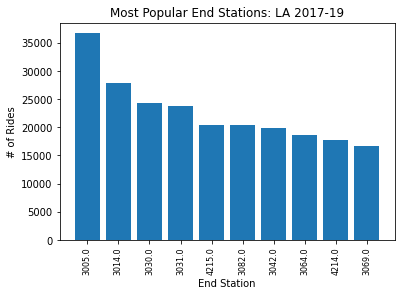

In [51]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: LA 2017-19")
plt.show()

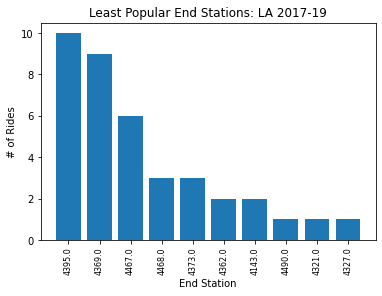

In [52]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: LA 2017-19")
plt.show()

In [53]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


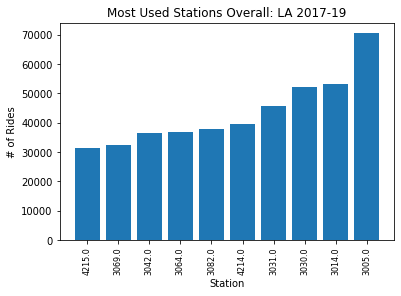

In [54]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: LA 2017-19")
plt.show()


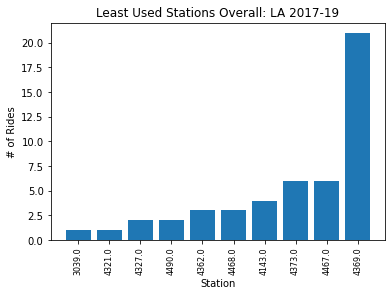

In [55]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: LA 2017-19")
plt.show()

In [56]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['start_station'], df1['end_station']]).unique()))
num_stations.append(stations_2017)

In [57]:
stations_2018 = len(list(pd.concat([df2['start_station'], df2['end_station']]).unique()))
num_stations.append(stations_2018)

In [58]:
stations_2019 = len(list(pd.concat([df3['start_station'], df3['end_station']]).unique()))
num_stations.append(stations_2019)

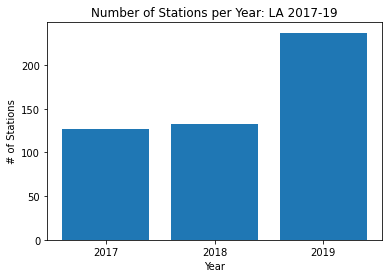

In [59]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: LA 2017-19")
plt.show()

In [60]:
#determine tripduration statistics (min, max, average, std, etc.)
data['duration'].describe()

count    785719.000000
mean         21.628853
std          29.736031
min           1.000000
25%           6.000000
50%          12.000000
75%          23.000000
max         239.000000
Name: duration, dtype: float64

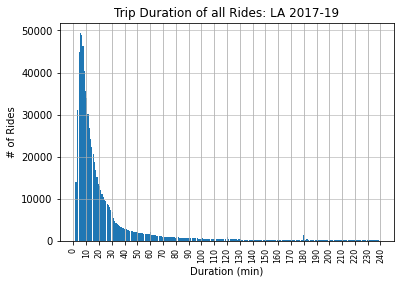

In [61]:
times = data['duration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: LA 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

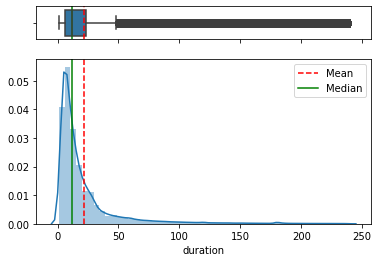

In [62]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['duration'].mean()
median=data['duration'].median()

sns.boxplot(data['duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [63]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['passholder_type'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Customer')

In [64]:
df_sub['duration'].describe()

count    481126.000000
mean         12.629581
std          17.446118
min           1.000000
25%           5.000000
50%           8.000000
75%          15.000000
max         239.000000
Name: duration, dtype: float64

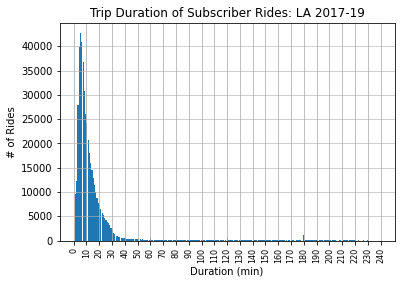

In [65]:
sub_times = df_sub['duration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: LA 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

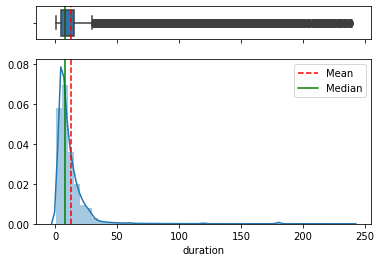

In [66]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['duration'].mean()
median=df_sub['duration'].median()

sns.boxplot(df_sub['duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [67]:
df_cust['duration'].describe()

count    304593.000000
mean         35.843834
std          38.342939
min           1.000000
25%          11.000000
50%          23.000000
75%          45.000000
max         239.000000
Name: duration, dtype: float64

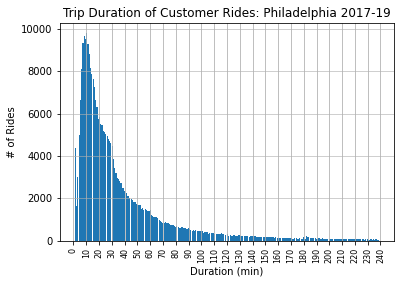

In [68]:
cust_times = df_cust['duration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: Philadelphia 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

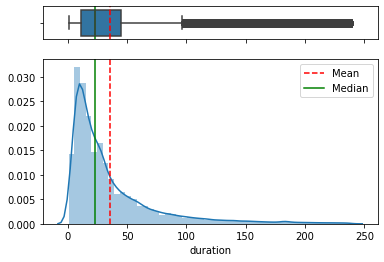

In [69]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['duration'].mean()
median=df_cust['duration'].median()

sns.boxplot(df_cust['duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [70]:
weekend_df['duration'].describe()

count    210588.000000
mean         29.409905
std          36.094353
min           1.000000
25%           9.000000
50%          17.000000
75%          33.000000
max         239.000000
Name: duration, dtype: float64

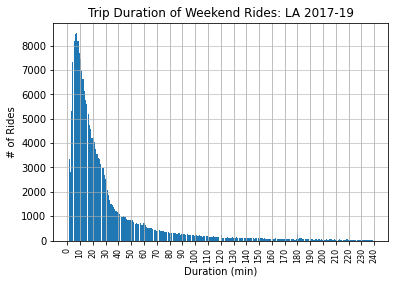

In [71]:
weekend_times = weekend_df['duration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: LA 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [72]:
weekday_df['duration'].describe()

count    575131.000000
mean         18.779770
std          26.470453
min           1.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         239.000000
Name: duration, dtype: float64

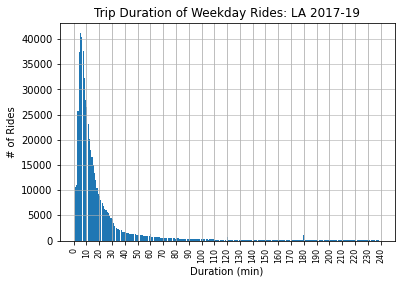

In [74]:
weekday_times = weekday_df['duration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: LA 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)